## Transfer Learning Inception V3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\DELL\Desktop\Sarfu\PW Data Science\Project\Cotton-Disease-Prediction-Deep-Learning-master\dataset\train'
valid_path = r'C:\Users\DELL\Desktop\Sarfu\PW Data Science\Project\Cotton-Disease-Prediction-Deep-Learning-master\dataset\test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\DELL\Desktop\Sarfu\PW Data Science\Project\Cotton-Disease-Prediction-Deep-Learning-master\dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r'C:\Users\DELL\Desktop\Sarfu\PW Data Science\Project\Cotton-Disease-Prediction-Deep-Learning-master\dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [14]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf

# Load ResNet152V2 without the top layers
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # <-- MUST be 4 units for 4 classes

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# fit the model
# This will train the model (takes some time)
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/20
61/61 [==============================] - 299s 5s/step - loss: 0.3929 - accuracy: 0.8678 - val_loss: 0.3524 - val_accuracy: 0.8774
Epoch 2/20
61/61 [==============================] - 429s 7s/step - loss: 0.1920 - accuracy: 0.9313 - val_loss: 0.2423 - val_accuracy: 0.9434
Epoch 3/20
61/61 [==============================] - 257s 4s/step - loss: 0.1637 - accuracy: 0.9452 - val_loss: 0.1857 - val_accuracy: 0.9151
Epoch 4/20
61/61 [==============================] - 2104s 35s/step - loss: 0.1387 - accuracy: 0.9534 - val_loss: 0.1313 - val_accuracy: 0.9434
Epoch 5/20
61/61 [==============================] - 584s 10s/step - loss: 0.1071 - accuracy: 0.9621 - val_loss: 0.1413 - val_accuracy: 0.9623
Epoch 6/20
61/61 [==============================] - 630s 10s/step - loss: 0.1166 - accuracy: 0.9580 - val_loss: 0.1138 - val_accuracy: 0.9434
Epoch 7/20
61/61 [==============================] - 1315s 22s/step - loss: 0.1128 - accuracy: 0.9544 - val_loss: 0.1173 - val_accuracy: 0.9528
Epoch 8

In [16]:
import matplotlib.pyplot as plt

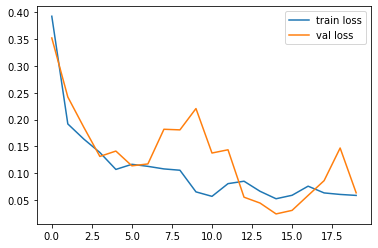

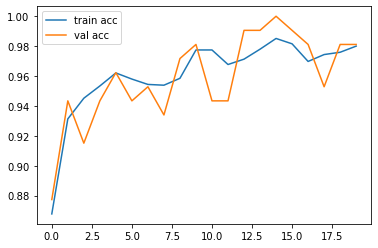

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [19]:
result = model.evaluate(test_set)
print("Test Loss, Test Accuracy :", result)

4/4 [==============================] - 7s 2s/step - loss: 0.0634 - accuracy: 0.9811
Test Loss, Test Accuracy : [0.06341538578271866, 0.9811320900917053]


In [20]:

y_pred = model.predict(test_set)


4/4 [==============================] - 9s 2s/step


In [21]:
y_pred

array([[8.08785073e-14, 1.00000000e+00, 3.22363780e-09, 1.92999172e-09],
       [1.00000000e+00, 4.79591368e-15, 3.39033001e-13, 4.38898830e-16],
       [1.78555375e-08, 1.43067434e-03, 8.08716095e-07, 9.98568416e-01],
       [5.91021126e-06, 1.74055825e-09, 9.99994040e-01, 1.08977039e-09],
       [9.99861121e-01, 7.76338197e-07, 1.38046220e-04, 5.05271913e-08],
       [7.29166549e-09, 2.33018771e-03, 5.85547714e-05, 9.97611284e-01],
       [9.99983549e-01, 6.79190437e-09, 1.63909554e-05, 1.10613826e-07],
       [1.28740212e-03, 8.35980618e-09, 9.98711467e-01, 1.23272059e-06],
       [9.57641099e-03, 6.42434816e-06, 9.87818480e-01, 2.59876391e-03],
       [4.05008898e-08, 6.53675675e-01, 2.02056434e-08, 3.46324265e-01],
       [9.99930143e-01, 7.10846626e-09, 6.94805276e-05, 3.44512586e-07],
       [9.99993801e-01, 6.20150013e-06, 5.71161287e-08, 1.31155158e-08],
       [9.69812453e-01, 3.05275171e-06, 1.02658069e-03, 2.91578565e-02],
       [7.92436361e-01, 1.14212791e-03, 2.04801708e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 0, 3, 2, 0, 3, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 3, 2, 0, 2, 3,
       2, 1, 2, 3, 3, 0, 1, 0, 1, 1, 0, 2, 0, 3, 2, 1, 2, 0, 2, 0, 1, 1,
       3, 2, 2, 1, 2, 0, 3, 3, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 3, 3, 1, 0,
       3, 2, 0, 2, 0, 3, 3, 0, 2, 3, 2, 1, 3, 2, 2, 3, 3, 2, 0, 1, 3, 2,
       1, 3, 0, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 2, 1, 3, 3], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model(r'C:\Users\DELL\Desktop\Sarfu\PW Data Science\Project\Cotton-Disease-Prediction-Deep-Learning-master\model_resnet152V2.h5')

In [32]:
img=image.load_img(r'C:\Users\DELL\Desktop\Sarfu\PW Data Science\Project\Cotton-Disease-Prediction-Deep-Learning-master\uploads\download_1.jpg',target_size=(224,224))



In [33]:
x=image.img_to_array(img)
x

array([[[219., 219., 227.],
        [219., 219., 227.],
        [216., 216., 224.],
        ...,
        [224., 227., 234.],
        [224., 227., 234.],
        [224., 227., 234.]],

       [[219., 219., 227.],
        [219., 219., 227.],
        [216., 216., 224.],
        ...,
        [224., 227., 234.],
        [224., 227., 234.],
        [224., 227., 234.]],

       [[220., 220., 228.],
        [220., 220., 228.],
        [217., 217., 225.],
        ...,
        [224., 227., 234.],
        [224., 227., 234.],
        [224., 227., 234.]],

       ...,

       [[213., 218., 224.],
        [213., 218., 224.],
        [213., 218., 224.],
        ...,
        [221., 224., 231.],
        [221., 224., 231.],
        [221., 224., 231.]],

       [[213., 218., 224.],
        [213., 218., 224.],
        [213., 218., 224.],
        ...,
        [220., 223., 230.],
        [221., 224., 231.],
        [221., 224., 231.]],

       [[213., 218., 224.],
        [213., 218., 224.],
        [213., 2

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[6.0193981e-03, 4.5234949e-05, 2.2730925e-03, 9.9166226e-01]],
      dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 132ms/step


In [39]:
a==1

array([False])

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.12.0'